In [20]:
# Espacio de trabajo
import collections
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import codecs
nltk.download('stopwords')
from nltk.corpus import stopwords
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber','colombia','colombianos', '|', '-', 'q', '1', '🇨🇴'])
%matplotlib inline
import sys
sys.path.append('../')
import funciones as fn
import re
import scipy
import numpy as np
import math
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Read input file, note the encoding is specified here 
# It may be different in your text file
df = pd.read_excel(r'E:\Base bonita\BX BM ENERO MAYO 2022\Colombia\Base_Colombia_Enero_Mayo_2022.xlsx')
#Tomamos la primera fila como nombre de las columnas
column_names=df.columns.to_list()
print(column_names)
#Cambiamos los espacios por _
column_names=[re.sub('\\s', '_', x) for x in column_names]
#Renombramos las columnas
df.columns=column_names
#Eliminamos la fila que tomamos como nombre de las columnas
df=df.iloc[1:,:]
#Hacemos un reset al index
df=df.reset_index(drop=True)
df

['Query Id', 'Query Name', 'Date', 'Title', 'Snippet', 'Url', 'Domain', 'Sentiment', 'Page Type', 'Language', 'Country Code', 'Continent Code', 'Continent', 'Country', 'City Code', 'Account Type', 'Added', 'Assignment', 'Author', 'Avatar', 'Category Details', 'Checked', 'City', 'Display URLs', 'Expanded URLs', 'Facebook Author ID', 'Facebook Comments', 'Facebook Likes', 'Facebook Role', 'Facebook Shares', 'Facebook Subtype', 'Full Name', 'Full Text', 'Gender', 'Hashtags', 'Impact', 'Impressions', 'Instagram Comments', 'Instagram Followers', 'Instagram Following', 'Instagram Interactions Count', 'Instagram Likes', 'Instagram Posts', 'Interest', 'Last Assignment Date', 'Latitude', 'Location Name', 'Longitude', 'Media Filter', 'Media URLs', 'Mentioned Authors', 'Original Url', 'Priority', 'Professions', 'Resource Id', 'Short URLs', 'Starred', 'Status', 'Subtype', 'Tags', 'Thread Author', 'Thread Created Date', 'Thread Entry Type', 'Thread Id', 'Thread URL', 'Total Monthly Visitors', 'Twit

,Query_Id,Query_Name,Date,Title,Snippet,Url,Domain,Sentiment,Page_Type,Language,...,Tipos_de_violencia_hacia_migrantes_-_Violencia_a_colectivos,Weblog_Title,excluir_keywords,nuevas_ciudades_-_Arauca,nuevas_ciudades_-_Bucaramanga,nuevas_ciudades_-_Pasto,nuevas_ciudades_-_Valledupar,xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
0,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:33.0,RT @DignoraHernandz #DiaDelTrabajador mucho qu...,RT @DignoraHernandz #DiaDelTrabajador mucho qu...,http://twitter.com/CarlosJKlein/statuses/15209...,twitter.com,negative,twitter,es,...,NaN,CarlosJKlein (Carlos Klein),NaN,NaN,NaN,NaN,NaN,X,NaN,NaN
1,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:29.0,RT @RoyBarreras Desde el puente fronterizo col...,RT @RoyBarreras Desde el puente fronterizo col...,http://twitter.com/40Willywe/statuses/15209150...,twitter.com,neutral,twitter,es,...,NaN,40Willywe (Willywe),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
2,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:24.0,"RT @FiscaliaCol #ATENCIÓN | La #Fiscalía, a tr...","RT @FiscaliaCol #ATENCIÓN | La #Fiscalía, a tr...",http://twitter.com/Epadillabarros/statuses/152...,twitter.com,neutral,twitter,es,...,NaN,Epadillabarros (Edgardo Padilla B),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
3,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:21.0,RT @Luigarcia11 @RevistaSemana Iván Duque logr...,RT @Luigarcia11 @RevistaSemana Iván Duque logr...,http://twitter.com/solermontiel/statuses/15209...,twitter.com,neutral,twitter,es,...,NaN,solermontiel (Yokobgta),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:55:20.0,@HRW_Venezuela @javiertarazona @FundaREDES_ @c...,@HRW_Venezuela @javiertarazona @FundaREDES_ @c...,http://twitter.com/JairoJrSandhers/statuses/15...,twitter.com,neutral,twitter,es,...,NaN,JairoJrSandhers (Jairo Sandoval Hernández),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171139,2000994664,[Q] Barómetro Migrante Colombia,2022-01-01 00:03:47.0,RT @JohnAbril88 Todo el mundo se fué para Melg...,RT @JohnAbril88 Todo el mundo se fué para Melg...,http://twitter.com/Economi70743182/statuses/14...,twitter.com,negative,twitter,es,...,NaN,Economi70743182 (Economics),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
171140,2000994664,[Q] Barómetro Migrante Colombia,2022-01-01 00:02:32.0,"@duncanhilluk @UKinVenezuela Feliz año, que bu...","@duncanhilluk @UKinVenezuela Feliz año, que bu...",http://twitter.com/alexisinet/statuses/1477067...,twitter.com,positive,twitter,es,...,NaN,alexisinet (Formacion Gerencial 1002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171141,2000994664,[Q] Barómetro Migrante Colombia,2022-01-01 00:01:36.0,RT @jafecoro Hoy fue mi hijo. 2 venezolanos en...,RT @jafecoro Hoy fue mi hijo. 2 venezolanos en...,http://twitter.com/MariArrietaO1/statuses/1477...,twitter.com,negative,twitter,es,...,NaN,MariArrietaO1 (Anest_ArrietaO),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
171142,2000994664,[Q] Barómetro Migrante Colombia,2022-01-01 00:01:19.0,"RT @lagranaldea ""Quise escribirles estas línea...","RT @lagranaldea ""Quise escribirles estas línea...",http://twitter.com/aydeemartinezd1/statuses/14...,twitter.com,positive,twitter,es,...,NaN,aydeemartinezd1 (aydee martinez de jimenez),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X


In [23]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
df['Clean_Text']=df['Snippet'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
df['Clean_Text']=df['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
df['Clean_Text']=df['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
df['Clean_Text']=df['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
df['Clean_Text']=df['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
df['Clean_Text']=df['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
df['Clean_Text']=df['Clean_Text'].replace('"', '', regex=True)
df['Clean_Text']=df['Clean_Text'].replace('|', '', regex=True)
df['Clean_Text']=df['Clean_Text'].replace('RT', '', regex=True)
df=df.reset_index(drop=True)
df=df.reset_index()
df = df.astype({"Clean_Text": str})
df.head(11)

,index,Query_Id,Query_Name,Date,Title,Snippet,Url,Domain,Sentiment,Page_Type,...,Weblog_Title,excluir_keywords,nuevas_ciudades_-_Arauca,nuevas_ciudades_-_Bucaramanga,nuevas_ciudades_-_Pasto,nuevas_ciudades_-_Valledupar,xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia,Clean_Text
0,0,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:33.0,RT @DignoraHernandz #DiaDelTrabajador mucho qu...,RT @DignoraHernandz #DiaDelTrabajador mucho qu...,http://twitter.com/CarlosJKlein/statuses/15209...,twitter.com,negative,twitter,...,CarlosJKlein (Carlos Klein),NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,@DignoraHernandz mucho que exigir y nada que ...
1,1,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:29.0,RT @RoyBarreras Desde el puente fronterizo col...,RT @RoyBarreras Desde el puente fronterizo col...,http://twitter.com/40Willywe/statuses/15209150...,twitter.com,neutral,twitter,...,40Willywe (Willywe),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,@RoyBarreras Desde el puente fronterizo colom...
2,2,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:24.0,"RT @FiscaliaCol #ATENCIÓN | La #Fiscalía, a tr...","RT @FiscaliaCol #ATENCIÓN | La #Fiscalía, a tr...",http://twitter.com/Epadillabarros/statuses/152...,twitter.com,neutral,twitter,...,Epadillabarros (Edgardo Padilla B),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,"@FiscaliaCol | La , a través del CTI, hizo ef..."
3,3,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:56:21.0,RT @Luigarcia11 @RevistaSemana Iván Duque logr...,RT @Luigarcia11 @RevistaSemana Iván Duque logr...,http://twitter.com/solermontiel/statuses/15209...,twitter.com,neutral,twitter,...,solermontiel (Yokobgta),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@Luigarcia11 @RevistaSemana Iván Duque logro ...
4,4,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:55:20.0,@HRW_Venezuela @javiertarazona @FundaREDES_ @c...,@HRW_Venezuela @javiertarazona @FundaREDES_ @c...,http://twitter.com/JairoJrSandhers/statuses/15...,twitter.com,neutral,twitter,...,JairoJrSandhers (Jairo Sandoval Hernández),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,@HRW_Venezuela @javiertarazona @FundaREDES_ @c...
5,5,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:54:17.0,RT @DignoraHernandz ¡Por sus derechos! Marchan...,RT @DignoraHernandz ¡Por sus derechos! Marchan...,http://twitter.com/CarlosJKlein/statuses/15209...,twitter.com,neutral,twitter,...,CarlosJKlein (Carlos Klein),NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,@DignoraHernandz ¡Por sus derechos! Marchan l...
6,6,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:53:13.0,"RT @OConchaa *Este cartel de los venezolanos, ...","RT @OConchaa *Este cartel de los venezolanos, ...",http://twitter.com/BgonzalezGymen2/statuses/15...,twitter.com,neutral,twitter,...,BgonzalezGymen2 (Gymena Bgonzalez),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,"@OConchaa *Este cartel de los venezolanos, es..."
7,7,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:52:13.0,RT @corpindustrias 2️⃣ La creación del #BancoD...,RT @corpindustrias 2️⃣ La creación del #BancoD...,http://twitter.com/Jeffers09337266/statuses/15...,twitter.com,neutral,twitter,...,Jeffers09337266 (Jefferson Enrique),NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,@corpindustrias 2️⃣ La creación del de la Cla...
8,8,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:51:45.0,RT @AcevedoPsuv2030 El J/G de ccs @Nahumjferna...,RT @AcevedoPsuv2030 El J/G de ccs @Nahumjferna...,http://twitter.com/Jeffers09337266/statuses/15...,twitter.com,neutral,twitter,...,Jeffers09337266 (Jefferson Enrique),NaN,NaN,NaN,NaN,NaN,X,NaN,NaN,@AcevedoPsuv2030 El J/G de ccs @Nahumjfernand...
9,9,2000994664,[Q] Barómetro Migrante Colombia,2022-05-01 23:51:42.0,RT @jbagbam Esta semana los colombianos pudimo...,RT @jbagbam Esta semana los colombianos pudimo...,http://twitter.com/cvospinav/statuses/15209138...,twitter.com,neutral,twitter,...,cvospinav (claudia ospina),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,@jbagbam Esta semana los colombianos pudimos ...


In [24]:
snippets = df['Clean_Text']

In [25]:
wordcount = {}
for texts in snippets:
    texts = texts.lower().split(' ')
    for word in texts:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in spanish_stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

In [27]:
# Print most common word
n_print = int(input("De que tamaño queremos el diccionario: "))
print("\nOK. Las {} palabras más populares son:\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

De que tamaño queremos el diccionario: 101

OK. Las 101 palabras más populares son:

 :  194562
venezolanos :  71276
venezolano :  43016
venezolana :  27995
si :  15201
país :  15068
venezuela :  14669
años :  10514
hoy :  9820
migrantes :  9172
@petrogustavo :  6326
gobierno :  6260
así :  6030
solo :  6028
hace :  5795
hacer :  5763
millones :  5664
dos :  5625
gente :  5481
agencia :  5091
pueblo :  4991
centro :  4868
ahora :  4771
presidente :  4722
personas :  4604
computadores :  4603
dice :  4577
venezolanas :  4488
vida :  4447
aquí :  4264
duque :  4188
campaña :  4160
electoral :  4136
bien :  3997
venecos :  3936
sido :  3826
chile :  3766
puede :  3743
mismo :  3705
veneco :  3676
vez :  3639
frontera :  3618
mundo :  3573
proceso :  3560
favor :  3557
contratando :  3526
tener :  3469
mal :  3395
migrante :  3381
democrático :  3371
alcalde :  3364
hambre :  3363
bogotá :  3346
parte :  3328
política :  3300
tipo :  3286
denuncia :  3223
cada :  3139
día :  3104
democraci

<AxesSubplot:xlabel='Word'>

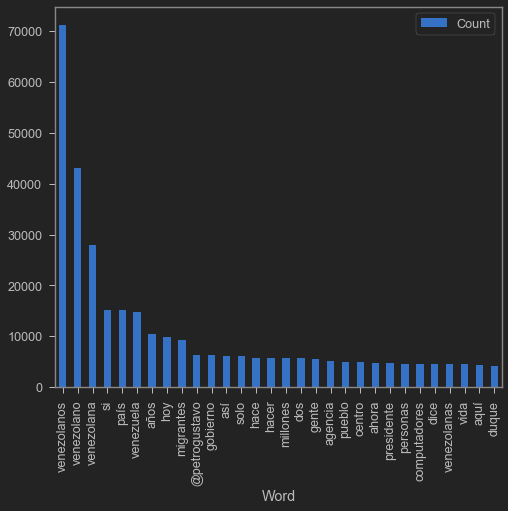

In [28]:
lst = word_counter.most_common(n_print)
if lst[0][0] == '':
    lst = lst[1:]
top = pd.DataFrame(lst[:30], columns = ['Word', 'Count'])
top.plot.bar(x='Word',y='Count')

In [29]:
print(df.columns.to_list())

['index', 'Query_Id', 'Query_Name', 'Date', 'Title', 'Snippet', 'Url', 'Domain', 'Sentiment', 'Page_Type', 'Language', 'Country_Code', 'Continent_Code', 'Continent', 'Country', 'City_Code', 'Account_Type', 'Added', 'Assignment', 'Author', 'Avatar', 'Category_Details', 'Checked', 'City', 'Display_URLs', 'Expanded_URLs', 'Facebook_Author_ID', 'Facebook_Comments', 'Facebook_Likes', 'Facebook_Role', 'Facebook_Shares', 'Facebook_Subtype', 'Full_Name', 'Full_Text', 'Gender', 'Hashtags', 'Impact', 'Impressions', 'Instagram_Comments', 'Instagram_Followers', 'Instagram_Following', 'Instagram_Interactions_Count', 'Instagram_Likes', 'Instagram_Posts', 'Interest', 'Last_Assignment_Date', 'Latitude', 'Location_Name', 'Longitude', 'Media_Filter', 'Media_URLs', 'Mentioned_Authors', 'Original_Url', 'Priority', 'Professions', 'Resource_Id', 'Short_URLs', 'Starred', 'Status', 'Subtype', 'Tags', 'Thread_Author', 'Thread_Created_Date', 'Thread_Entry_Type', 'Thread_Id', 'Thread_URL', 'Total_Monthly_Visitor

In [30]:
vacunacion = df.copy()
vacunacion = vacunacion.rename(columns={'Categorias_barómetro_v3_-_Educación': 'Educacion', 
                                        'Categorias_barómetro_v3_-_Integración': 'Integracion',
                                        'Categorias_barómetro_v3_-_Salud': 'Salud',
                                        'Categorias_barómetro_v3_-_Seguridad': 'Seguridad',
                                        'Categorias_barómetro_v3_-_Trabajo': 'Trabajo',
                                        'Categorias_barómetro_v3_-_Xenofobia': 'Xenofobia',
                                        'Categorias_barómetro_v3_-_Mujer': 'Mujer'})
lista_cols = ['Educacion','Integracion' , 'Salud','Seguridad' ,'Trabajo'  , 'Xenofobia', 'Mujer']
for col in lista_cols:
    vacunacion.loc[vacunacion[col] == 'X', col] = col
    vacunacion.loc[vacunacion[col].isnull(), col] = ''
vacunacion['Categoría_Barometro_v3'] = vacunacion['Educacion'] + ', ' + vacunacion['Integracion'] + ', ' + vacunacion['Salud'] + ', ' + vacunacion['Seguridad'] + ', ' +vacunacion['Trabajo'] + ', ' + vacunacion['Xenofobia']+ ', ' + vacunacion['Mujer']
vacunacion.loc[vacunacion['Categoría_Barometro_v3'].str.find(',') == 0, 'Categoría_Barometro_v3'] = ''
vacunacion.loc[vacunacion['Categoría_Barometro_v3'].str.find(',') == 1, 'Categoría_Barometro_v3'] = ''
vacunacion.loc[vacunacion['Categoría_Barometro_v3'].str.find(' ') == 0, 'Categoría_Barometro_v3'] = ''
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].str.rstrip(', ')
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].str.rstrip(',')
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].replace(r'(,\s){1,}', '', regex=True)
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].replace(r'([A-Z])', r',\1', regex=True)
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].str.lstrip(',')
vacunacion['Categoría_Barometro_v3']

0          
1          
2          
3          
4          
         ..
171139     
171140     
171141     
171142     
171143     
Name: Categoría_Barometro_v3, Length: 171144, dtype: object

In [46]:
def search_palabra(df, tupla):
    """
    Retorna una pequeña DataFrame en donde todas las filas tienen almenos una mención de una palabra de interés
    """
    data = list()
    diccionario = dict()
    palabras = list()
    count = list()
    for l,j in tupla:
        if len(l) > 1:
            palabras.append(l)
            count.append(j)
    i = 0
    for palabra in palabras:
        contiene = df[df['Clean_Text'].str.contains(palabra)]
        mean_reach = contiene['Reach_(new)'].mean()
        seguidores_promedio = contiene['Twitter_Followers'].mean()
        seguidores_max = contiene['Twitter_Followers'].max()
        impacto_promedio = contiene['Impact'].mean()
        impresiones_promedio = contiene['Impressions'].mean()
        if math.isnan(mean_reach):
            main_cat = ''
            main_sentiment = ''
        else:
            main_cat = contiene.Categoría_Barometro_v3.mode()[0]
            if main_cat == '':
                no_contiene = contiene[contiene['Categoría_Barometro_v3'] != '']
                try:
                    main_cat = no_contiene.Categoría_Barometro_v3.mode()[0]
                except:
                    main_cat = ''
            main_sentiment = contiene.Sentiment.mode()[0]
        diccionario = {'Palabra': palabra, 'Alcance promedio': mean_reach, 'Categoría principal': main_cat, 'Sentimiento principal': main_sentiment
                       ,'Veces usada': count[i], 'Seguidores promedio': seguidores_promedio, 'Seguidores máximo': seguidores_max, 'Impacto promedio': impacto_promedio
                       ,'Impresiones promedio': impresiones_promedio}
        i += 1
        data.append(diccionario)
    return pd.DataFrame(data)

In [47]:
prueba = search_palabra(vacunacion, lst)
prueba

,Palabra,Alcance promedio,Categoría principal,Sentimiento principal,Veces usada,Seguidores promedio,Seguidores máximo,Impacto promedio,Impresiones promedio
0,venezolanos,2986.936864,Educacion,negative,71276,41888.850755,9491027.0,10.243066,52809.226039
1,venezolano,2892.646931,Educacion,negative,43016,39044.710990,9491027.0,10.793992,48505.331369
2,venezolana,3152.260812,Educacion,negative,27995,46494.994990,9490148.0,11.539319,56393.052571
3,si,2639.179641,Educacion,negative,15201,34927.736089,9491027.0,10.936111,45089.541088
4,país,2689.250912,Educacion,negative,15068,41358.658736,9302846.0,10.533358,58613.926580
...,...,...,...,...,...,...,...,...,...
94,jóvenes,1961.202564,Educacion,negative,2524,26346.308793,6109792.0,8.015427,44887.988641
95,apoyo,2130.825975,Educacion,neutral,2521,20110.263760,8218382.0,11.143892,27361.784928
96,van,1957.969306,Educacion,negative,2513,19598.936147,8298877.0,8.370317,22271.859266
97,pena,2583.953573,Educacion,negative,2512,12678.943580,7937241.0,7.024282,15913.038633


In [48]:
prueba.to_excel('Diccionario_colombia_ene_mayo_2022.xlsx')

# Ahora la base de vacunación

In [11]:
import codecs

In [12]:
df = pd.read_excel('Base_afiliacion_vacunacion.xlsx')

C:\Users\JOSE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [14]:
xenofobia = fn.limpieza_base(df)
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
more_cols = list()
for line in pruebas.readlines():
    more_cols.append(line.strip())
del_cols = del_cols + more_cols
print(del_cols)
xenofobia = xenofobia.drop(del_cols, axis=1)
for col in xenofobia.columns: 
    print(col)
xenofobia.head(11)

Escriba la fila donde se encuentran los nombres de las columnas - 5
                 Bulk Mentions Download             Unnamed: 2  \
5                            Query Name                   Date   
6       [Q] Barómetro migrante Colombia  2021-04-15 21:40:37.0   
7       [Q] Barómetro migrante Colombia  2021-04-15 21:39:47.0   
8       [Q] Barómetro migrante Colombia  2021-04-15 21:39:37.0   
9       [Q] Barómetro migrante Colombia  2021-04-15 21:39:34.0   
...                                 ...                    ...   
251913  [Q] Barómetro migrante Colombia  2020-12-22 00:00:20.0   
251914  [Q] Barómetro migrante Colombia  2020-12-22 00:00:20.0   
251915  [Q] Barómetro migrante Colombia  2020-12-22 00:00:13.0   
251916  [Q] Barómetro migrante Colombia  2020-12-22 00:00:05.0   
251917  [Q] Barómetro migrante Colombia  2020-12-22 00:00:02.0   

                                               Unnamed: 3  \
5                                                   Title   
6       RT @Repor

City_Code
Account_Type
Author
City
Gender
Hashtags
Impact
Impressions
Interest
Mentioned_Authors
Professions
Thread_Author
Thread_Entry_Type
Total_Monthly_Visitors
Twitter_Followers
Twitter_Following
Twitter_Reply_Count
Twitter_Retweets
Twitter_Tweets
Twitter_Verified
Reach_(new)
BM_2021_-_Afiliación_a_salud_de_migrantes
BM_2021_-_Vacunación
BM_2021_-_Xenofobia
Categoría_Barometro_v3_-_Educación_
Categoría_Barometro_v3_-_Integración
Categoría_Barometro_v3_-_Salud_
Categoría_Barometro_v3_-_Seguridad_
Categoría_Barometro_v3_-_Trabajo_
Categoría_Barometro_v3_-_Vivienda_
Categoría_Barometro_v3_-_Xenofobia_
Categoría_Barometro_v4_-_Denuncia_Xenofobia
Categoría_Barometro_v4_-_Xenofobia
Categorías_prueba_-_Denuncia
Categorías_prueba_-_Xenofobia
Categorías_prueba_-_denuncia_xenofobia_cl
Categorías_prueba_-_denuncia_xenofobia_col
Departamentos_-_Atlantico_(Barranqulla)
Departamentos_-_Cundinamarca
Departamentos_-_Meta_(Villavicencio)
Departamentos_-_Valle_del_Cauca_(Cali)
xenofobia_e_Integració

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,Departamentos_-_Atlantico_(Barranqulla),Departamentos_-_Cundinamarca,Departamentos_-_Meta_(Villavicencio),Departamentos_-_Valle_del_Cauca_(Cali),xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
0,2021-04-15 21:40:37.0,"RT @ReporteroRosa Hoy [15/4], Netflix [España]...",twitter.com,neutral,COL.Bogota.Bogota,individual,MalejaZB,Bogota,female,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
1,2021-04-15 21:39:47.0,"RT @AcostaFrancisko @piedadcordoba Ojo, esto e...",twitter.com,neutral,COL.Bogota.Bogota,individual,455Osmen,Bogota,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
2,2021-04-15 21:39:37.0,no solucionó los problemas de colombia esta do...,twitter.com,negative,COL.Bogota.Bogota,individual,cedritoscapri,Bogota,unknown,NaN,...,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN
3,2021-04-15 21:39:34.0,"RT @AlvaroUribeVel David Smolansky, habla desd...",twitter.com,neutral,COL.Caqueta.Florencia,individual,CndorAndino1,Florencia,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
4,2021-04-15 21:38:49.0,RT @venezolanoenpie Un profesor en EE.UU. gana...,twitter.com,negative,COL.Bogota.Bogota,individual,Alejox_Riveros,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
5,2021-04-15 21:37:36.0,RT @AndyPelinegra @KevinCTriana Así es!! Hay o...,twitter.com,negative,COL.Risaralda.Pereira,individual,ripalo1957,Pereira,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
6,2021-04-15 21:37:18.0,RT @scrappymas Ayer estaban varios amigos de m...,twitter.com,negative,COL.Bogota.Bogota,individual,macongorey,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
7,2021-04-15 21:37:14.0,RT @ElPitazoTV #Migracion Venezolanos en #Repu...,twitter.com,neutral,COL.Atlantico.Barranquilla,individual,PilinLeon,Barranquilla,male,"#migracion, #republicadominicana, #15abr",...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-04-15 21:36:20.0,@Camilo83904957 @MitchellAlejan6 @Liberta42014...,twitter.com,neutral,COL.Bogota.Bogota,individual,jorgeandresbell,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
9,2021-04-15 21:36:06.0,Juan Manuel Santos le entregó el país a Lafar ...,twitter.com,neutral,COL.Bogota.Bogota,individual,ElPatrioterista,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X


In [16]:
vacunacion = xenofobia[xenofobia['BM_2021_-_Vacunación'] == 'X']
vacunacion

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,Departamentos_-_Atlantico_(Barranqulla),Departamentos_-_Cundinamarca,Departamentos_-_Meta_(Villavicencio),Departamentos_-_Valle_del_Cauca_(Cali),xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
26,2021-04-15 21:25:37.0,Exclusiva | Infectólogo Moraima Hernández: La ...,twitter.com,neutral,COL.Bogota.Bogota,individual,SaverioVivas2,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
186,2021-04-15 20:02:39.0,RT @luchaalmada #Ahora @jorgerpsuv: Se le ha e...,twitter.com,negative,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,"#ahora, #13abr, #victoriapopularrebelde",...,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,2021-04-15 20:02:31.0,RT @Mippcivzla #EnVivo 🔴 | Presidente de la AN...,twitter.com,neutral,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,#envivo,...,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,2021-04-15 20:02:17.0,RT @Mippcivzla #EnVivo🔴| Pdte. de la AN @jorge...,twitter.com,neutral,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,"#envivo, #victoriapopularrebelde",...,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,2021-04-15 20:01:56.0,RT @Mippcivzla #EnVivo🔴| Pdte. de la AN @jorge...,twitter.com,neutral,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,"#envivo, #victoriapopularrebelde",...,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251904,2020-12-22 00:01:37.0,RT @jcpastrana No vacunar a los dos millones d...,twitter.com,negative,COL.Bogota.Bogota,individual,BillyRoldan4,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
251905,2020-12-22 00:00:28.0,Ese cuento delas vacunas para los venezolanos ...,twitter.com,positive,NaN,individual,La_Amayaa,NaN,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
251906,2020-12-22 00:00:27.0,RT @agaviriau No vacunar a los venezolanos es ...,twitter.com,negative,COL.Bogota.Bogota,individual,GustavoAPerezR,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251907,2020-12-22 00:00:20.0,"RT @ismene2 Ve, todo lo que ha pasado en este ...",twitter.com,positive,COL.Antioquia.Medellin,individual,jjrestrepoa,Medellin,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X


In [17]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
vacunacion['Clean_Text']=vacunacion['Snippet'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace('"', '', regex=True)
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace('|', '', regex=True)
vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace('RT', '', regex=True)
vacunacion=vacunacion.reset_index(drop=True)
vacunacion=vacunacion.reset_index()
vacunacion = vacunacion.astype({"Clean_Text": str})
vacunacion.head(11)

<ipython-input-17-9a0a06bd3a14>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacunacion['Clean_Text']=vacunacion['Snippet'].replace(r"http\S+", '', regex=True)
<ipython-input-17-9a0a06bd3a14>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vacunacion['Clean_Text']=vacunacion['Clean_Text'].replace('#\\w+', '', regex=True)
<ipython-input-17-9a0a06bd3a14>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,index,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,...,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,Departamentos_-_Atlantico_(Barranqulla),Departamentos_-_Cundinamarca,Departamentos_-_Meta_(Villavicencio),Departamentos_-_Valle_del_Cauca_(Cali),xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia,Clean_Text
0,0,2021-04-15 21:25:37.0,Exclusiva | Infectólogo Moraima Hernández: La ...,twitter.com,neutral,COL.Bogota.Bogota,individual,SaverioVivas2,Bogota,male,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,Exclusiva | Infectólogo Moraima Hernández: La ...
1,1,2021-04-15 20:02:39.0,RT @luchaalmada #Ahora @jorgerpsuv: Se le ha e...,twitter.com,negative,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@luchaalmada @jorgerpsuv: Se le ha entregado ...
2,2,2021-04-15 20:02:31.0,RT @Mippcivzla #EnVivo 🔴 | Presidente de la AN...,twitter.com,neutral,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@Mippcivzla 🔴 | Presidente de la AN @jorgerps...
3,3,2021-04-15 20:02:17.0,RT @Mippcivzla #EnVivo🔴| Pdte. de la AN @jorge...,twitter.com,neutral,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@Mippcivzla 🔴| Pdte. de la AN @jorgerpsuv: Se...
4,4,2021-04-15 20:01:56.0,RT @Mippcivzla #EnVivo🔴| Pdte. de la AN @jorge...,twitter.com,neutral,COL.Bogota.Bogota,individual,MedinaSkarly,Bogota,female,...,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN,@Mippcivzla 🔴| Pdte. de la AN @jorgerpsuv: El...
5,5,2021-04-15 19:47:52.0,RT @NelsonpVzla #15Abr NARCOLAS O LAVAS O PRES...,twitter.com,negative,COL.Santander.Bucaramanga,individual,jelares551,Bucaramanga,male,...,X,X,NaN,NaN,NaN,NaN,NaN,X,X,@NelsonpVzla NARCOLAS O LAVAS O PRESTAS LA BA...
6,6,2021-04-15 19:33:42.0,"RT @JuanPGuanipa ¡Seguimos en #Miranda! Ahora,...",twitter.com,negative,COL.Bogota.Bogota,individual,15401152,Bogota,unknown,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@JuanPGuanipa ¡Seguimos en ! Ahora, recorrien..."
7,7,2021-04-15 19:07:24.0,RT @elcomerciocom #ATENCIÓN | Médicos en Venez...,twitter.com,neutral,COL.Bogota.Bogota,individual,rasbe,Bogota,male,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,@elcomerciocom | Médicos en Venezuela se pron...
8,8,2021-04-15 18:55:45.0,RT @elcomerciocom #ATENCIÓN | Médicos en Venez...,twitter.com,neutral,COL.Bogota.Bogota,individual,moralito50,Bogota,male,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,@elcomerciocom | Médicos en Venezuela se pron...
9,9,2021-04-15 18:36:49.0,RT @elcomerciocom #ATENCIÓN | Médicos en Venez...,twitter.com,neutral,COL.Bogota.Bogota,individual,milohe,Bogota,male,...,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X,@elcomerciocom | Médicos en Venezuela se pron...


In [18]:
snippets = vacunacion['Clean_Text']

In [19]:
wordcount = {}
for texts in snippets:
    texts = texts.lower().split(' ')
    for word in texts:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in spanish_stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

In [20]:
# Print most common word
n_print = int(input("De que tamaño queremos el diccionario: "))
print("\nOK. Las {} palabras más populares son:\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

De que tamaño queremos el diccionario: 101

OK. Las 101 palabras más populares son:

 :  15944
venezolanos :  13445
vacunar :  4529
vacunas :  4523
vacuna :  4419
migrantes :  2387
millones :  2189
duque :  2103
país :  2017
si :  1962
venezuela :  1744
vacunación :  1686
@ivanduque :  1567
presidente :  1456
gobierno :  1395
venezolano :  1394
primero :  1263
ahora :  1198
población :  1182
hoy :  1149
personas :  1130
irregulares :  1071
salud :  991
van :  981
venezolana :  937
hijos :  881
dice :  859
dijo :  855
quieren :  790
covid-19 :  786
colombiano :  781
tener :  777
vacunarse :  766
10 :  753
nacionalidad :  741
punto :  736
aquí :  730
años :  687
propuesta :  675
va :  653
iván :  629
vista :  620
casi :  618
inmigrantes :  615
ilegales :  608
estatus :  602
xenofobia :  600
discrimina :  600
forma :  598
epidemiológico :  594
migratorio :  580
ciudadanos :  567
territorio :  564
hace :  563
internacional :  558
vacunados :  557
antiética :  540
20 :  520
@gustavobolivar 

<AxesSubplot:xlabel='Word'>

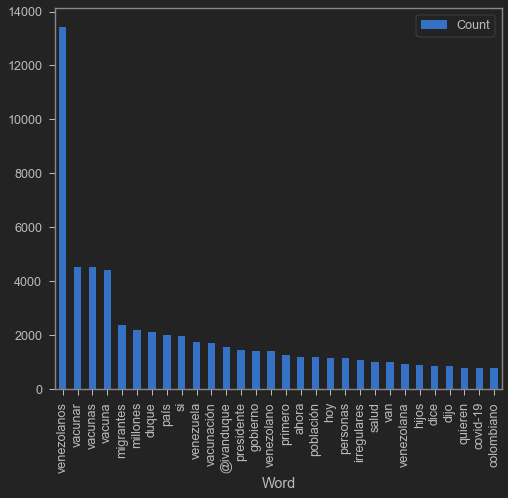

In [21]:
lst = word_counter.most_common(n_print)
if lst[0][0] == '':
    lst = lst[1:]
top = pd.DataFrame(lst[:30], columns = ['Word', 'Count'])
top.plot.bar(x='Word',y='Count')

In [22]:
print(vacunacion.columns.to_list())

['index', 'Date', 'Snippet', 'Domain', 'Sentiment', 'City_Code', 'Account_Type', 'Author', 'City', 'Gender', 'Hashtags', 'Impact', 'Impressions', 'Interest', 'Mentioned_Authors', 'Professions', 'Thread_Author', 'Thread_Entry_Type', 'Total_Monthly_Visitors', 'Twitter_Followers', 'Twitter_Following', 'Twitter_Reply_Count', 'Twitter_Retweets', 'Twitter_Tweets', 'Twitter_Verified', 'Reach_(new)', 'BM_2021_-_Afiliación_a_salud_de_migrantes', 'BM_2021_-_Vacunación', 'BM_2021_-_Xenofobia', 'Categoría_Barometro_v3_-_Educación_', 'Categoría_Barometro_v3_-_Integración', 'Categoría_Barometro_v3_-_Salud_', 'Categoría_Barometro_v3_-_Seguridad_', 'Categoría_Barometro_v3_-_Trabajo_', 'Categoría_Barometro_v3_-_Vivienda_', 'Categoría_Barometro_v3_-_Xenofobia_', 'Categoría_Barometro_v4_-_Denuncia_Xenofobia', 'Categoría_Barometro_v4_-_Xenofobia', 'Categorías_prueba_-_Denuncia', 'Categorías_prueba_-_Xenofobia', 'Categorías_prueba_-_denuncia_xenofobia_cl', 'Categorías_prueba_-_denuncia_xenofobia_col', 'Dep

In [52]:
vacunacion = vacunacion.rename(columns={'Categoría_Barometro_v3_-_Educación_': 'Educacion', 
                                        'Categoría_Barometro_v3_-_Integración': 'Integracion',
                                        'Categoría_Barometro_v3_-_Salud_': 'Salud',
                                        'Categoría_Barometro_v3_-_Seguridad_': 'Seguridad',
                                        'Categoría_Barometro_v3_-_Trabajo_': 'Trabajo',
                                        'Categoría_Barometro_v3_-_Vivienda_': 'Vivienda',
                                        'Categoría_Barometro_v3_-_Xenofobia_': 'Xenofobia'})
lista_cols = ['Educacion','Integracion' , 'Salud','Seguridad' ,'Trabajo' ,'Vivienda' , 'Xenofobia']
for col in lista_cols:
    vacunacion.loc[vacunacion[col] == 'X', col] = col
    vacunacion.loc[vacunacion[col].isnull(), col] = ''
vacunacion['Categoría_Barometro_v3'] = vacunacion['Educacion'] + ', ' + vacunacion['Integracion'] + ', ' + vacunacion['Salud'] + ', ' + vacunacion['Seguridad'] + ', ' +vacunacion['Trabajo'] + ', ' + vacunacion['Vivienda'] + ', ' + vacunacion['Xenofobia']
vacunacion.loc[vacunacion['Categoría_Barometro_v3'].str.find(',') == 0, 'Categoría_Barometro_v3'] = ''
vacunacion.loc[vacunacion['Categoría_Barometro_v3'].str.find(',') == 1, 'Categoría_Barometro_v3'] = ''
vacunacion.loc[vacunacion['Categoría_Barometro_v3'].str.find(' ') == 0, 'Categoría_Barometro_v3'] = ''
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].str.rstrip(', ')
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].str.rstrip(',')
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].replace(r'(,\s){1,}', '', regex=True)
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].replace(r'([A-Z])', r',\1', regex=True)
vacunacion['Categoría_Barometro_v3']=vacunacion['Categoría_Barometro_v3'].str.lstrip(',')

In [53]:
for row in vacunacion['Categoría_Barometro_v3']:
    print(row)






































Educacion,Salud



Educacion,Salud


Educacion,Salud,Trabajo













Educacion,Salud,Trabajo


























Educacion,Salud
Educacion,Salud,Seguridad,Trabajo,Vivienda


































































Educacion,Vivienda,Xenofobia
Educacion,Seguridad






































































































Educacion,Salud
























Educacion,Salud












Educacion,Salud,Seguridad







Educacion,Xenofobia














Educacion,Salud






Educacion,Vivienda,Xenofobia












































Educacion,Salud,Seguridad,Vivienda











Educacion,Salud,Seguridad,Trabajo,Xenofobia






Educacion,Integracion,Salud,Trabajo
















































Educacion,Integracion,Salud


























Educacion,Integracion,Salud,Trabajo

Educacion,Salud,Seguridad,Trabajo







Educacion,Integracion



























































































































































































































































































































Educacion,Integracion,Salud,Seguridad,Trabajo,Vivienda
Educacion,Integracion,Salud,Seguridad





























































Educacion,Integracion,Salud,Seguridad





Educacion,Salud,Trabajo

Educacion,Integracion,Salud,Seguridad




















Educacion,Salud,Seguridad















Educacion,Salud,Trabajo,Vivienda,Xenofobia
Educacion,Salud,Trabajo,Xenofobia

Educacion,Salud,Trabajo,Xenofobia
Educacion,Salud,Seguridad,Vivienda


Educacion,Salud,Trabajo,Xenofobia


Educacion,Salud,Seguridad,Trabajo,Xenofobia




Educacion,Salud







Educacion,Salud,Seguridad




Educacion,Integracion,Salud,Seguridad












Educacion,Salud,Trabajo,Xenof
















































Educacion,Salud

Educacion,Salud,Seguridad,Trabajo,Xenofobia


















Educacion,Integracion,Salud,Trabajo
















































Educacion,Integracion,Salud,Seguridad,Trabajo,Vivienda











Educacion,Salud





















Educacion,Integracion,Salud,Seguridad,Trabajo


































































Educacion,Integracion,Salud,Seguridad






























































































Educacion,Salud,Seguridad,Vivienda
























































































































Educacion,Salud,Xenofobia


Educacion,Salud,Xenofobia
Educacion,Salud,Xenofobia












Educacion,Salud





















































Educacion,Salud



Educacion,Integracion,Salud













Educacion,Integracion,Salud,Trabajo




Educacion,Integracion,Salud

In [64]:
prueba = search_palabra(vacunacion, lst)
prueba

,Palabra,Alcance promedio,Categoría principal,Sentimiento principal,Veces usada,Seguidores promedio,Seguidores máximo,Impacto promedio,Impresiones promedio
0,venezolanos,2588.000422,"Educacion,Salud",negative,13445,31189.566979,8984653.0,9.063058,36308.100099
1,vacunar,2463.193522,"Educacion,Salud,Xenofobia",negative,4529,25868.252198,8913878.0,6.836107,29793.396776
2,vacunas,2261.240854,"Educacion,Salud",negative,4523,24701.489568,8076828.0,8.406064,29823.852499
3,vacuna,2593.943100,"Educacion,Salud",negative,4419,33533.283989,8984653.0,8.217920,38064.106334
4,migrantes,4084.462204,"Educacion,Salud,Trabajo",negative,2387,72516.017167,8984653.0,12.437495,78633.605866
...,...,...,...,...,...,...,...,...,...
95,mismos,1351.500000,"Educacion,Salud,Seguridad,Trabajo,Xenofobia",negative,400,9847.160622,2831307.0,5.845313,10697.544041
96,extranjeros,1412.690537,"Educacion,Salud,Seguridad,Xenofobia",negative,398,2251.417085,201069.0,7.317136,4286.871859
97,2,1700.316574,"Educacion,Salud",negative,396,14860.950544,8075793.0,9.598128,16371.370920
98,irregular,5129.036964,"Educacion,Salud,Trabajo",neutral,393,76411.649644,8913878.0,11.290759,88888.911441


In [65]:
prueba.to_excel('Diccionario_vacunacion.xlsx')

# Ahora la base de Perú

In [3]:
df = pd.read_excel('Base_peru_ene_2021.xlsx')

C:\Users\JOSE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
xenofobia = fn.limpieza_base(df)
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
#pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
#more_cols = list()
#for line in pruebas.readlines():
#    more_cols.append(line.strip())
#del_cols = del_cols + more_cols
#print(del_cols)
xenofobia = xenofobia.drop(del_cols, axis=1)
for col in xenofobia.columns: 
    print(col)
xenofobia.head(11)

Escriba la fila donde se encuentran los nombres de las columnas - 5
             Bulk Mentions Download             Unnamed: 2  \
5                        Query Name                   Date   
6       [Q] Barómetro migrante Perú  2021-04-16 23:24:37.0   
7       [Q] Barómetro migrante Perú  2021-04-16 23:22:38.0   
8       [Q] Barómetro migrante Perú  2021-04-16 23:21:53.0   
9       [Q] Barómetro migrante Perú  2021-04-16 23:21:22.0   
...                             ...                    ...   
114811  [Q] Barómetro migrante Perú  2021-01-01 00:29:57.0   
114812  [Q] Barómetro migrante Perú  2021-01-01 00:23:39.0   
114813  [Q] Barómetro migrante Perú  2021-01-01 00:19:02.0   
114814  [Q] Barómetro migrante Perú  2021-01-01 00:16:34.0   
114815  [Q] Barómetro migrante Perú  2021-01-01 00:09:47.0   

                                               Unnamed: 3  \
5                                                   Title   
6       RT @juan_diaz12 Los venezolanos somos la peor ...   
7   

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Reach_(new),Categorías_barómetro_-_Educación,Categorías_barómetro_-_Integración,Categorías_barómetro_-_Salud,Categorías_barómetro_-_Seguridad,Categorías_barómetro_-_Trabajo,Categorías_barómetro_-_Xenofobia,Ciudades_-_Arequipa,Ciudades_-_Callao,Ciudades_-_Lima
0,2021-04-16 23:24:37.0,RT @juan_diaz12 Los venezolanos somos la peor ...,twitter.com,negative,PER.Lima Province.Lima,individual,manuel_placido,Lima,male,NaN,...,0,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-04-16 23:22:38.0,RT @joseragas Utilizar a inmigrantes venezolan...,twitter.com,negative,PER.Lima Province.Lima,individual,Brevania,Lima,unknown,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-04-16 23:21:53.0,@becocaceres Oeee mascota ya te olvidaste que ...,twitter.com,negative,PER.Lima Province.Lima,individual,Dominic45268971,Lima,male,NaN,...,0,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-16 23:21:22.0,RT @RomanPediatra @pamelaneith Este la agarró ...,twitter.com,neutral,PER.Lima Province.Lima,individual,Peruano_joseutp,Lima,male,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-16 23:21:20.0,RT @joseragas Utilizar a inmigrantes venezolan...,twitter.com,negative,PER.Lima Province.Lima,individual,Uncafeyunlapiz,Lima,male,NaN,...,3522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021-04-16 23:20:51.0,"RT @IsabelJimnezCa4 ""Testigo"" que hasta la fec...",twitter.com,neutral,PER.Lima Province.Lima,individual,AlvaroJ43971004,Lima,male,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021-04-16 23:20:16.0,RT @juan_diaz12 Los venezolanos somos la peor ...,twitter.com,negative,PER.Lima Province.Lima,individual,esaguz,Lima,male,NaN,...,449,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021-04-16 23:19:43.0,RT @ruben85537071 Cuando un norteamericano con...,twitter.com,neutral,PER.Lima Province.Lima,individual,Hector45548730,Lima,male,"#inhabilitenavizcarra, #comunismoolibertad, #v...",...,3352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021-04-16 23:19:07.0,"@TatianaAstengoB Al final emigraremos muchos, ...",twitter.com,negative,PER.Lima Province.Lima,individual,PaolaTA23,Lima,female,NaN,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-04-16 23:19:03.0,No sé quién Dayana Mendoza pero es tendencia e...,twitter.com,negative,PER.Lima Province.Lima,individual,FranRivasplata,Lima,male,NaN,...,0,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
peru = xenofobia

In [9]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
peru['Clean_Text']=peru['Snippet'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
peru['Clean_Text']=peru['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
peru['Clean_Text']=peru['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
peru['Clean_Text']=peru['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
peru['Clean_Text']=peru['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
peru['Clean_Text']=peru['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
peru['Clean_Text']=peru['Clean_Text'].replace('"', '', regex=True)
peru['Clean_Text']=peru['Clean_Text'].replace('|', '', regex=True)
peru['Clean_Text']=peru['Clean_Text'].replace('RT', '', regex=True)
peru=peru.reset_index(drop=True)
peru=peru.reset_index()
peru = peru.astype({"Clean_Text": str})
peru.head(11)

,index,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,...,Categorías_barómetro_-_Educación,Categorías_barómetro_-_Integración,Categorías_barómetro_-_Salud,Categorías_barómetro_-_Seguridad,Categorías_barómetro_-_Trabajo,Categorías_barómetro_-_Xenofobia,Ciudades_-_Arequipa,Ciudades_-_Callao,Ciudades_-_Lima,Clean_Text
0,0,2021-04-16 23:24:37.0,RT @juan_diaz12 Los venezolanos somos la peor ...,twitter.com,negative,PER.Lima Province.Lima,individual,manuel_placido,Lima,male,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@juan_diaz12 Los venezolanos somos la peor pe...
1,1,2021-04-16 23:22:38.0,RT @joseragas Utilizar a inmigrantes venezolan...,twitter.com,negative,PER.Lima Province.Lima,individual,Brevania,Lima,unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@joseragas Utilizar a inmigrantes venezolanos...
2,2,2021-04-16 23:21:53.0,@becocaceres Oeee mascota ya te olvidaste que ...,twitter.com,negative,PER.Lima Province.Lima,individual,Dominic45268971,Lima,male,...,NaN,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,@becocaceres Oee mascota ya te olvidaste que t...
3,3,2021-04-16 23:21:22.0,RT @RomanPediatra @pamelaneith Este la agarró ...,twitter.com,neutral,PER.Lima Province.Lima,individual,Peruano_joseutp,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@RomanPediatra @pamelaneith Este la agarró po...
4,4,2021-04-16 23:21:20.0,RT @joseragas Utilizar a inmigrantes venezolan...,twitter.com,negative,PER.Lima Province.Lima,individual,Uncafeyunlapiz,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@joseragas Utilizar a inmigrantes venezolanos...
5,5,2021-04-16 23:20:51.0,"RT @IsabelJimnezCa4 ""Testigo"" que hasta la fec...",twitter.com,neutral,PER.Lima Province.Lima,individual,AlvaroJ43971004,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@IsabelJimnezCa4 Testigo que hasta la fecha n...
6,6,2021-04-16 23:20:16.0,RT @juan_diaz12 Los venezolanos somos la peor ...,twitter.com,negative,PER.Lima Province.Lima,individual,esaguz,Lima,male,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@juan_diaz12 Los venezolanos somos la peor pe...
7,7,2021-04-16 23:19:43.0,RT @ruben85537071 Cuando un norteamericano con...,twitter.com,neutral,PER.Lima Province.Lima,individual,Hector45548730,Lima,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,@ruben85537071 Cuando un norteamericano conoc...
8,8,2021-04-16 23:19:07.0,"@TatianaAstengoB Al final emigraremos muchos, ...",twitter.com,negative,PER.Lima Province.Lima,individual,PaolaTA23,Lima,female,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"@TatianaAstengoB Al final emigraremos muchos, ..."
9,9,2021-04-16 23:19:03.0,No sé quién Dayana Mendoza pero es tendencia e...,twitter.com,negative,PER.Lima Province.Lima,individual,FranRivasplata,Lima,male,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No sé quién Dayana Mendoza pero es tendencia e...


In [10]:
snippets = peru['Clean_Text']
wordcount = {}
for texts in snippets:
    texts = texts.lower().split(' ')
    for word in texts:
        word = word.replace(".","")
        word = word.replace(",","")
        word = word.replace(":","")
        word = word.replace("\"","")
        word = word.replace("!","")
        word = word.replace("â€œ","")
        word = word.replace("â€˜","")
        word = word.replace("*","")
        if word not in spanish_stopwords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] += 1

In [11]:
# Print most common word
n_print = int(input("De que tamaño queremos el diccionario: "))
print("\nOK. Las {} palabras más populares son:\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

De que tamaño queremos el diccionario: 101

OK. Las 101 palabras más populares son:

 :  125361
venezolanos :  54786
venezolano :  31491
perú :  17513
venezolana :  16168
país :  13798
si :  11264
peruanos :  8789
venezuela :  7728
ahora :  5808
peruano :  5764
solo :  5451
delincuentes :  5363
xenofobia :  5226
migrantes :  4817
así :  4584
años :  4579
gente :  4365
hoy :  4364
aquí :  4317
gobierno :  4055
bien :  3770
hace :  3764
nacionalidad :  3672
venecos :  3649
salaverry :  3412
casa :  3349
dos :  3165
mismo :  3036
quieren :  3029
pueblo :  2997
extranjeros :  2931
debe :  2898
video :  2876
gracias :  2840
vida :  2822
personas :  2813
ver :  2813
joven :  2796
veneco :  2734
peru :  2659
lima :  2564
odio :  2503
día :  2498
hacer :  2488
venezolanas :  2397
millones :  2396
migración :  2387
frontera :  2318
trabajo :  2292
puede :  2277
chile :  2266
mejor :  2173
policía :  2166
salud :  2160
candidato :  2146
@policiaperu :  2119
mayoría :  2117
luego :  2112
presiden

<AxesSubplot:xlabel='Word'>

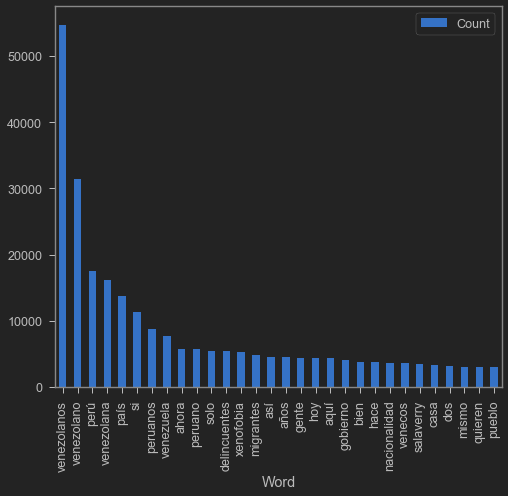

In [12]:
lst = word_counter.most_common(n_print)
if lst[0][0] == '':
    lst = lst[1:]
top = pd.DataFrame(lst[:30], columns = ['Word', 'Count'])
top.plot.bar(x='Word',y='Count')

In [13]:
print(peru.columns.to_list())

['index', 'Date', 'Snippet', 'Domain', 'Sentiment', 'City_Code', 'Account_Type', 'Author', 'City', 'Gender', 'Hashtags', 'Impact', 'Impressions', 'Interest', 'Mentioned_Authors', 'Professions', 'Thread_Author', 'Thread_Entry_Type', 'Total_Monthly_Visitors', 'Twitter_Followers', 'Twitter_Following', 'Twitter_Reply_Count', 'Twitter_Retweets', 'Twitter_Tweets', 'Twitter_Verified', 'Reach_(new)', 'Categorías_barómetro_-_Educación', 'Categorías_barómetro_-_Integración', 'Categorías_barómetro_-_Salud', 'Categorías_barómetro_-_Seguridad', 'Categorías_barómetro_-_Trabajo', 'Categorías_barómetro_-_Xenofobia', 'Ciudades_-_Arequipa', 'Ciudades_-_Callao', 'Ciudades_-_Lima', 'Clean_Text']


In [14]:
peru = peru.rename(columns={'Categorías_barómetro_-_Educación': 'Educacion', 
                                        'Categorías_barómetro_-_Integración': 'Integracion',
                                        'Categorías_barómetro_-_Salud': 'Salud',
                                        'Categorías_barómetro_-_Seguridad': 'Seguridad',
                                        'Categorías_barómetro_-_Trabajo': 'Trabajo',
                                        'Categorías_barómetro_-_Xenofobia': 'Xenofobia'})
lista_cols = ['Educacion','Integracion' ,'Salud', 'Seguridad', 'Trabajo', 'Xenofobia']
for col in lista_cols:
    peru.loc[peru[col] == 'X', col] = col
    peru.loc[peru[col].isnull(), col] = ''
peru['Categoría_Barometro_v3'] = peru['Educacion'] + ', ' + peru['Integracion'] + ', ' + peru['Salud'] + ', ' + peru['Seguridad'] + ', ' +peru['Trabajo']  + ', ' + peru['Xenofobia']
peru.loc[peru['Categoría_Barometro_v3'].str.find(',') == 0, 'Categoría_Barometro_v3'] = ''
peru.loc[peru['Categoría_Barometro_v3'].str.find(',') == 1, 'Categoría_Barometro_v3'] = ''
peru.loc[peru['Categoría_Barometro_v3'].str.find(' ') == 0, 'Categoría_Barometro_v3'] = ''
peru['Categoría_Barometro_v3']=peru['Categoría_Barometro_v3'].str.rstrip(', ')
peru['Categoría_Barometro_v3']=peru['Categoría_Barometro_v3'].str.rstrip(',')
peru['Categoría_Barometro_v3']=peru['Categoría_Barometro_v3'].replace(r'(,\s){1,}', '', regex=True)
peru['Categoría_Barometro_v3']=peru['Categoría_Barometro_v3'].replace(r'([A-Z])', r',\1', regex=True)
peru['Categoría_Barometro_v3']=peru['Categoría_Barometro_v3'].str.lstrip(',')

In [17]:
prueba = search_palabra(peru, lst)
prueba

,Palabra,Alcance promedio,Categoría principal,Sentimiento principal,Veces usada,Seguidores promedio,Seguidores máximo,Impacto promedio,Impresiones promedio
0,venezolanos,1801.620007,Educacion,negative,54786,9303.046628,3236472,7.415706,12000.221766
1,venezolano,1806.300549,Educacion,negative,31491,10217.221475,3236472,7.646801,12972.117144
2,perú,699.507353,"Educacion,Salud",negative,17513,620.970803,18045,7.528676,1186.846715
3,venezolana,2068.487749,Educacion,negative,16168,12025.773706,3200006,10.022711,14177.868347
4,país,1674.153528,Educacion,negative,13798,6679.054188,2964036,7.174665,8390.406203
...,...,...,...,...,...,...,...,...,...
95,tan,1527.334354,Educacion,negative,1664,6548.679007,3200064,8.381740,8333.151276
96,días,1390.182334,Educacion,negative,1662,6696.408706,3200006,7.604606,7620.021161
97,covid,1320.310404,"Educacion,Salud",positive,1647,3447.056075,646959,4.527601,4926.896347
98,situación,2915.319191,"Educacion,Salud,Trabajo",negative,1642,18669.217419,2350749,12.896345,22928.667920


In [18]:
prueba.to_excel('Diccionario_peru.xlsx')

# Base de marcación extra (miedos y problemas de los migrantes)

In [2]:
df = pd.read_excel('Afiliacion_vacunacion_marcacion.xlsx')
df

C:\Users\JOSE\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:214: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Report:,Bulk Mentions Download,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 214,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223
0,Brand:,[Q] Barómetro migrante Colombia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,From:,Fri Jan 01 00:00:00 UTC 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,To:,Tue Apr 27 00:00:00 UTC 2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Label:,Base Afiliación y vacunación,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249143,2000474926,[Q] Barómetro migrante Colombia,2021-01-01 00:09:16.0,RT @OspinaPauce Cali. Av 2 norte entre 24 y 25...,RT @OspinaPauce Cali. Av 2 norte entre 24 y 25...,http://twitter.com/fepins/statuses/13447978042...,twitter.com,negative,twitter,es,...,NaN,fepins (Fernando Pinzon),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
249144,2000474926,[Q] Barómetro migrante Colombia,2021-01-01 00:06:52.0,RT @HamonJairo @OspinaPauce Jueputas venecos!!...,RT @HamonJairo @OspinaPauce Jueputas venecos!!...,http://twitter.com/nogogu/statuses/13447971993...,twitter.com,negative,twitter,es,...,NaN,nogogu (MARIA),NaN,NaN,NaN,NaN,NaN,NaN,X,X
249145,2000474926,[Q] Barómetro migrante Colombia,2021-01-01 00:06:44.0,RT @venezolanoenpie La pregunta de la semana h...,RT @venezolanoenpie La pregunta de la semana h...,http://twitter.com/VICTOR_HUGO_C_/statuses/134...,twitter.com,neutral,twitter,es,...,NaN,VICTOR_HUGO_C_ (Victor Hugo),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X
249146,2000474926,[Q] Barómetro migrante Colombia,2021-01-01 00:06:05.0,RT @OspinaPauce Cali. Av 2 norte entre 24 y 25...,RT @OspinaPauce Cali. Av 2 norte entre 24 y 25...,http://twitter.com/nogogu/statuses/13447970049...,twitter.com,negative,twitter,es,...,NaN,nogogu (MARIA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,X


In [6]:
xenofobia = fn.limpieza_base(df)
del_cols=["Query_Name", "Url", "Page_Type", "Language", "Country_Code", "Continent", "Continent_Code", 
          "Country", "Added", "Assignment", "Avatar", "Category_Details", 
          "Checked", "Display_URLs", "Expanded_URLs", "Facebook_Author_ID", "Facebook_Comments",
          "Facebook_Likes", "Facebook_Role", "Facebook_Shares", "Facebook_Subtype",
          "Full_Text", "Full_Name", "Instagram_Comments", "Instagram_Followers", "Instagram_Following",
          "Instagram_Likes", "Instagram_Interactions_Count", "Instagram_Posts",
          "Last_Assignment_Date", "Latitude", "Location_Name", "Longitude", "Media_Filter",
          "Media_URLs", "Original_Url", "Priority", "Short_URLs", "Resource_Id", "Starred",
          "Status", "Subtype", "Thread_Created_Date", "Thread_Id",
          "Thread_URL", "Twitter_Author_ID", "Twitter_Channel_Role", "Twitter_Reply_to", "Twitter_Retweet_of", 
          "Updated", "Blog_Name", "Copyright", "Item_Review", "Page_Type_Name", "Linkedin_Comments", 
          "Linkedin_Engagement", "Linkedin_Impressions", "Linkedin_Likes", "Linkedin_Shares", "Linkedin_Sponsored", 
          "Linkedin_Video_Views", "Parent_Blog_Name", "Parent_Post_Id", "Pub_Type", "Publisher_Sub_Type", "Rating", 
          "Reddit_Score", "Region", "Region_Code", "Root_Blog_Name", "Root_Post_Id", "Weblog_Title", "Title", "Tags"]
pruebas = codecs.open('Columnas_a_eliminar.txt','r',encoding='utf-8')
more_cols = list()
for line in pruebas.readlines():
    more_cols.append(line.strip())
del_cols = del_cols + more_cols
print(del_cols)
xenofobia = xenofobia.drop(del_cols, axis=1)
for col in xenofobia.columns: 
    print(col)
xenofobia.head(11)

Escriba la fila donde se encuentran los nombres de las columnas - 5
                 Bulk Mentions Download             Unnamed: 2  \
5                            Query Name                   Date   
6       [Q] Barómetro migrante Colombia  2021-04-26 21:53:50.0   
7       [Q] Barómetro migrante Colombia  2021-04-26 21:53:46.0   
8       [Q] Barómetro migrante Colombia  2021-04-26 21:53:13.0   
9       [Q] Barómetro migrante Colombia  2021-04-26 21:53:04.0   
...                                 ...                    ...   
249143  [Q] Barómetro migrante Colombia  2021-01-01 00:09:16.0   
249144  [Q] Barómetro migrante Colombia  2021-01-01 00:06:52.0   
249145  [Q] Barómetro migrante Colombia  2021-01-01 00:06:44.0   
249146  [Q] Barómetro migrante Colombia  2021-01-01 00:06:05.0   
249147  [Q] Barómetro migrante Colombia  2021-01-01 00:00:02.0   

                                               Unnamed: 3  \
5                                                   Title   
6       RT @Maria

Date
Snippet
Domain
Sentiment
City_Code
Account_Type
Author
City
Gender
Hashtags
Impact
Impressions
Interest
Mentioned_Authors
Professions
Thread_Author
Thread_Entry_Type
Total_Monthly_Visitors
Twitter_Followers
Twitter_Following
Twitter_Reply_Count
Twitter_Retweets
Twitter_Tweets
Twitter_Verified
Reach_(new)
BM_2021_-_Afiliación_a_salud_de_migrantes
BM_2021_-_Comunidad_Internacional
BM_2021_-_Estatus_Migratorio
BM_2021_-_Instituciones
BM_2021_-_Migrantes_Irregulares
BM_2021_-_Migrantes_Regulares
BM_2021_-_NO_Instituciones
BM_2021_-_Vacunación_y_Bioseguridad
BM_2021_-_Xenofobia
Categoría_Barometro_v3_-_Educación_
Categoría_Barometro_v3_-_Integración
Categoría_Barometro_v3_-_Salud_
Categoría_Barometro_v3_-_Seguridad_
Categoría_Barometro_v3_-_Trabajo_
Categoría_Barometro_v3_-_Vivienda_
Categoría_Barometro_v3_-_Xenofobia_
Categoría_Barometro_v4_-_Denuncia_Xenofobia
Categoría_Barometro_v4_-_Xenofobia
Categorías_prueba_-_Denuncia
Categorías_prueba_-_Xenofobia
Categorías_prueba_-_denuncia_xe

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,Departamentos_-_Atlantico_(Barranqulla),Departamentos_-_Cundinamarca,Departamentos_-_Meta_(Villavicencio),Departamentos_-_Valle_del_Cauca_(Cali),xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
0,2021-04-26 21:53:50.0,RT @MariaFdaCabal Curioso que Ma. José Pizarro...,twitter.com,negative,COL.Antioquia.Medellin,individual,DiegoAlvarezO17,Medellin,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
1,2021-04-26 21:53:46.0,RT @MariaFdaCabal Curioso que Ma. José Pizarro...,twitter.com,negative,COL.Santander.Bucaramanga,individual,roures,Bucaramanga,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
2,2021-04-26 21:53:13.0,RT @MariaFdaCabal Curioso que Ma. José Pizarro...,twitter.com,negative,NaN,individual,YASS31547764,NaN,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
3,2021-04-26 21:53:04.0,RT @valienteguerre1 ENVIAMOS ANGELES DE PROTEC...,twitter.com,positive,COL.Bogota.Bogota,individual,Luisaangelicaab,Bogota,unknown,NaN,...,NaN,NaN,X,NaN,NaN,NaN,NaN,X,NaN,NaN
4,2021-04-26 21:52:46.0,RT @guille94 Hit 2870 de Miguel Cabrera en su ...,twitter.com,positive,COL.Bogota.Bogota,individual,endervel,Bogota,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
5,2021-04-26 21:52:13.0,RT @MariaFdaCabal Curioso que Ma. José Pizarro...,twitter.com,negative,COL.Valle del Cauca.Cali,individual,laverdadesDios7,Cali,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
6,2021-04-26 21:51:15.0,RT @MariaFdaCabal Curioso que Ma. José Pizarro...,twitter.com,negative,COL.Bogota.Bogota,individual,JoseJoalma77,Bogota,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
7,2021-04-26 21:49:56.0,RT @AngieRomher REBEKA @AriadnaRebeka SEXY TRA...,twitter.com,positive,COL.Bogota.Bogota,individual,diego3activo,Bogota,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
8,2021-04-26 21:49:27.0,@SismaMujer Una lideresa que haya denunciado a...,twitter.com,negative,COL.Choco.Quibdo,individual,CarmenH72553662,Quibdo,female,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
9,2021-04-26 21:49:20.0,Soy Venezolana yo me río de mis desgracias.,twitter.com,negative,COL.Bolivar.Cartagena,individual,otravenecamas,Cartagena,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X


In [8]:
for columna in xenofobia.columns.to_list():
    print(columna)

Date
Snippet
Domain
Sentiment
City_Code
Account_Type
Author
City
Gender
Hashtags
Impact
Impressions
Interest
Mentioned_Authors
Professions
Thread_Author
Thread_Entry_Type
Total_Monthly_Visitors
Twitter_Followers
Twitter_Following
Twitter_Reply_Count
Twitter_Retweets
Twitter_Tweets
Twitter_Verified
Reach_(new)
BM_2021_-_Afiliación_a_salud_de_migrantes
BM_2021_-_Comunidad_Internacional
BM_2021_-_Estatus_Migratorio
BM_2021_-_Instituciones
BM_2021_-_Migrantes_Irregulares
BM_2021_-_Migrantes_Regulares
BM_2021_-_NO_Instituciones
BM_2021_-_Vacunación_y_Bioseguridad
BM_2021_-_Xenofobia
Categoría_Barometro_v3_-_Educación_
Categoría_Barometro_v3_-_Integración
Categoría_Barometro_v3_-_Salud_
Categoría_Barometro_v3_-_Seguridad_
Categoría_Barometro_v3_-_Trabajo_
Categoría_Barometro_v3_-_Vivienda_
Categoría_Barometro_v3_-_Xenofobia_
Categoría_Barometro_v4_-_Denuncia_Xenofobia
Categoría_Barometro_v4_-_Xenofobia
Categorías_prueba_-_Denuncia
Categorías_prueba_-_Xenofobia
Categorías_prueba_-_denuncia_xe

In [11]:
base_vacunacion_salud = xenofobia[(xenofobia['BM_2021_-_Vacunación_y_Bioseguridad'] == 'X') | (xenofobia['BM_2021_-_Afiliación_a_salud_de_migrantes'] == 'X')]
base_vacunacion_salud

,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,Hashtags,...,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,Departamentos_-_Atlantico_(Barranqulla),Departamentos_-_Cundinamarca,Departamentos_-_Meta_(Villavicencio),Departamentos_-_Valle_del_Cauca_(Cali),xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
15,2021-04-26 21:46:44.0,RT @alvaroforero EEUU entregará 60 millones de...,twitter.com,negative,COL.Bogota.Bogota,individual,juancho_zp,Bogota,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
109,2021-04-26 21:00:43.0,RT @alvaroforero EEUU entregará 60 millones de...,twitter.com,negative,COL.Caldas.Manizales,individual,mambre61,Manizales,unknown,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
149,2021-04-26 20:48:25.0,Claman ante El Vaticano para que ayude a apres...,twitter.com,neutral,COL.Atlantico.Barranquilla,individual,diazmocco,Barranquilla,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
216,2021-04-26 20:19:34.0,RT @zonacero Detienen a venezolano por una bro...,twitter.com,neutral,COL.Atlantico.Barranquilla,individual,jorgecura1070,Barranquilla,male,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
315,2021-04-26 19:43:43.0,...capturado por la patrulla del cuadrante un ...,minuto30.com,neutral,NaN,NaN,Juliet Jimenez,NaN,female,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249037,2021-01-01 02:43:55.0,"Consígalas y vacune venezolanos, así el gobier...",twitter.com,neutral,COL.Bogota.Bogota,individual,restrepotata,Bogota,female,NaN,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
249042,2021-01-01 02:30:00.0,#Emergencia | Todos los venezolanos en Colombi...,twitter.com,neutral,COL.Bogota.Bogota,individual,AvilaMonserrate,Bogota,unknown,#emergencia,...,NaN,X,X,NaN,X,NaN,NaN,NaN,X,X
249080,2021-01-01 01:32:35.0,RT @FleytesH Bueno y no decía este buey qué es...,twitter.com,neutral,COL.Antioquia.Medellin,individual,FleytesH,Medellin,unknown,NaN,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249082,2021-01-01 01:31:55.0,Bueno y no decía este buey qué estaban haciend...,twitter.com,neutral,COL.Antioquia.Medellin,individual,FleytesH,Medellin,unknown,NaN,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
base_vacunacion_salud = base_vacunacion_salud.reset_index()
base_vacunacion_salud

,index,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,...,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,Departamentos_-_Atlantico_(Barranqulla),Departamentos_-_Cundinamarca,Departamentos_-_Meta_(Villavicencio),Departamentos_-_Valle_del_Cauca_(Cali),xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
0,15,2021-04-26 21:46:44.0,RT @alvaroforero EEUU entregará 60 millones de...,twitter.com,negative,COL.Bogota.Bogota,individual,juancho_zp,Bogota,unknown,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
1,109,2021-04-26 21:00:43.0,RT @alvaroforero EEUU entregará 60 millones de...,twitter.com,negative,COL.Caldas.Manizales,individual,mambre61,Manizales,unknown,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
2,149,2021-04-26 20:48:25.0,Claman ante El Vaticano para que ayude a apres...,twitter.com,neutral,COL.Atlantico.Barranquilla,individual,diazmocco,Barranquilla,male,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
3,216,2021-04-26 20:19:34.0,RT @zonacero Detienen a venezolano por una bro...,twitter.com,neutral,COL.Atlantico.Barranquilla,individual,jorgecura1070,Barranquilla,male,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
4,315,2021-04-26 19:43:43.0,...capturado por la patrulla del cuadrante un ...,minuto30.com,neutral,NaN,NaN,Juliet Jimenez,NaN,female,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,249037,2021-01-01 02:43:55.0,"Consígalas y vacune venezolanos, así el gobier...",twitter.com,neutral,COL.Bogota.Bogota,individual,restrepotata,Bogota,female,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
9851,249042,2021-01-01 02:30:00.0,#Emergencia | Todos los venezolanos en Colombi...,twitter.com,neutral,COL.Bogota.Bogota,individual,AvilaMonserrate,Bogota,unknown,...,NaN,X,X,NaN,X,NaN,NaN,NaN,X,X
9852,249080,2021-01-01 01:32:35.0,RT @FleytesH Bueno y no decía este buey qué es...,twitter.com,neutral,COL.Antioquia.Medellin,individual,FleytesH,Medellin,unknown,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9853,249082,2021-01-01 01:31:55.0,Bueno y no decía este buey qué estaban haciend...,twitter.com,neutral,COL.Antioquia.Medellin,individual,FleytesH,Medellin,unknown,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
base_vacunacion_salud['Snippet']= base_vacunacion_salud['Snippet'].replace(r'(.)\1+', r'\1\1', regex=True).str.strip()
base_vacunacion_salud['Snippet']= base_vacunacion_salud['Snippet'].replace('\s+', ' ', regex=True).str.strip()
base_vacunacion_salud['Snippet']= base_vacunacion_salud['Snippet'].replace(r"http\S+", '', regex=True)
base_vacunacion_salud = base_vacunacion_salud[~base_vacunacion_salud['Snippet'].str.startswith('RT')]
base_vacunacion_salud

,index,Date,Snippet,Domain,Sentiment,City_Code,Account_Type,Author,City,Gender,...,Categorías_prueba_-_Xenofobia,Categorías_prueba_-_denuncia_xenofobia_cl,Categorías_prueba_-_denuncia_xenofobia_col,Departamentos_-_Atlantico_(Barranqulla),Departamentos_-_Cundinamarca,Departamentos_-_Meta_(Villavicencio),Departamentos_-_Valle_del_Cauca_(Cali),xenofobia_e_Integración_-_Integración,xenofobia_e_Integración_-_Xenofobia,xenofobia_e_Integración_-_not_xenofobia
2,149,2021-04-26 20:48:25.0,Claman ante El Vaticano para que ayude a apres...,twitter.com,neutral,COL.Atlantico.Barranquilla,individual,diazmocco,Barranquilla,male,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
4,315,2021-04-26 19:43:43.0,..capturado por la patrulla del cuadrante un h...,minuto30.com,neutral,NaN,NaN,Juliet Jimenez,NaN,female,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
6,570,2021-04-26 18:47:41.0,Las fotos fueron difundidas en redes sociales ...,minuto30.com,neutral,NaN,NaN,NaN,NaN,unknown,...,NaN,X,NaN,NaN,NaN,NaN,NaN,X,NaN,NaN
9,841,2021-04-26 17:10:16.0,Detienen a venezolano por una broma en redes c...,twitter.com,neutral,COL.Atlantico.Barranquilla,individual,zonacero,Barranquilla,unknown,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
15,1082,2021-04-26 14:34:37.0,#REGIONES Realizamos jornada de vacunación con...,twitter.com,neutral,COL.Bogota.Bogota,individual,ICACOLOMBIA,Bogota,male,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9849,249026,2021-01-01 02:54:30.0,"..estaremos incluyendo, al igual que los menor...",extra.com.co,neutral,NaN,NaN,NaN,NaN,unknown,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
9850,249037,2021-01-01 02:43:55.0,"Consígalas y vacune venezolanos, así el gobier...",twitter.com,neutral,COL.Bogota.Bogota,individual,restrepotata,Bogota,female,...,NaN,X,X,NaN,NaN,NaN,NaN,NaN,NaN,X
9851,249042,2021-01-01 02:30:00.0,#Emergencia | Todos los venezolanos en Colombi...,twitter.com,neutral,COL.Bogota.Bogota,individual,AvilaMonserrate,Bogota,unknown,...,NaN,X,X,NaN,X,NaN,NaN,NaN,X,X
9853,249082,2021-01-01 01:31:55.0,Bueno y no decía este buey qué estaban haciend...,twitter.com,neutral,COL.Antioquia.Medellin,individual,FleytesH,Medellin,unknown,...,NaN,X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
tamano = base_vacunacion_salud.shape[0]
print(tamano)
base_para_marcar = pd.DataFrame({'Snippet': base_vacunacion_salud['Snippet'], 'Miedos': np.zeros(tamano), 
                                 'Mitos Fake News': np.zeros(tamano), 'Migración regular': np.zeros(tamano), 'Migración irregular': np.zeros(tamano)})
base_para_marcar

4282


,Snippet,Miedos,Mitos Fake News,Migración regular,Migración irregular
2,Claman ante El Vaticano para que ayude a apres...,0.0,0.0,0.0,0.0
4,..capturado por la patrulla del cuadrante un h...,0.0,0.0,0.0,0.0
6,Las fotos fueron difundidas en redes sociales ...,0.0,0.0,0.0,0.0
9,Detienen a venezolano por una broma en redes c...,0.0,0.0,0.0,0.0
15,#REGIONES Realizamos jornada de vacunación con...,0.0,0.0,0.0,0.0
...,...,...,...,...,...
9849,"..estaremos incluyendo, al igual que los menor...",0.0,0.0,0.0,0.0
9850,"Consígalas y vacune venezolanos, así el gobier...",0.0,0.0,0.0,0.0
9851,#Emergencia | Todos los venezolanos en Colombi...,0.0,0.0,0.0,0.0
9853,Bueno y no decía este buey qué estaban haciend...,0.0,0.0,0.0,0.0


In [15]:
base_para_marcar.to_excel('base_marcacion_vacunacion_afiliacion.xlsx')